--- Schritt 2: 'Schmutzigen' Rohdatensatz laden ---
Datensatz geladen: rfd_main.csv
Dimensionen (Zeilen, Spalten): (1326, 15)

--- Schritt 3: Zielspalten definieren, begründen und auf NaN prüfen ---
Prüfung auf fehlende Werte (NaN) in den Zielspalten:
replies    0
views      0
votes      0
dtype: int64

STATUS: Keine fehlenden Werte (NaN) in den Zielspalten gefunden. Die Isolation Forest-Methode kann direkt angewendet werden.

--- Schritt 4: Isolation Forest-Methode anwenden ---
Daten für Isolation Forest-Analyse vorbereitet (Shape: (1326, 3))
Starte Isolation Forest-Analyse (fit_predict)...
Isolation Forest-Analyse abgeschlossen.
ERGEBNIS (Isolation Forest): 144 Zeilen wurden als Ausreißer (Label -1) identifiziert.

--- Schritt 5: Visualisierung der Isolation Forest-Ergebnisse (Streudiagramme) ---
Erstelle Streudiagramme zur Visualisierung der Isolation Forest-Ergebnisse...


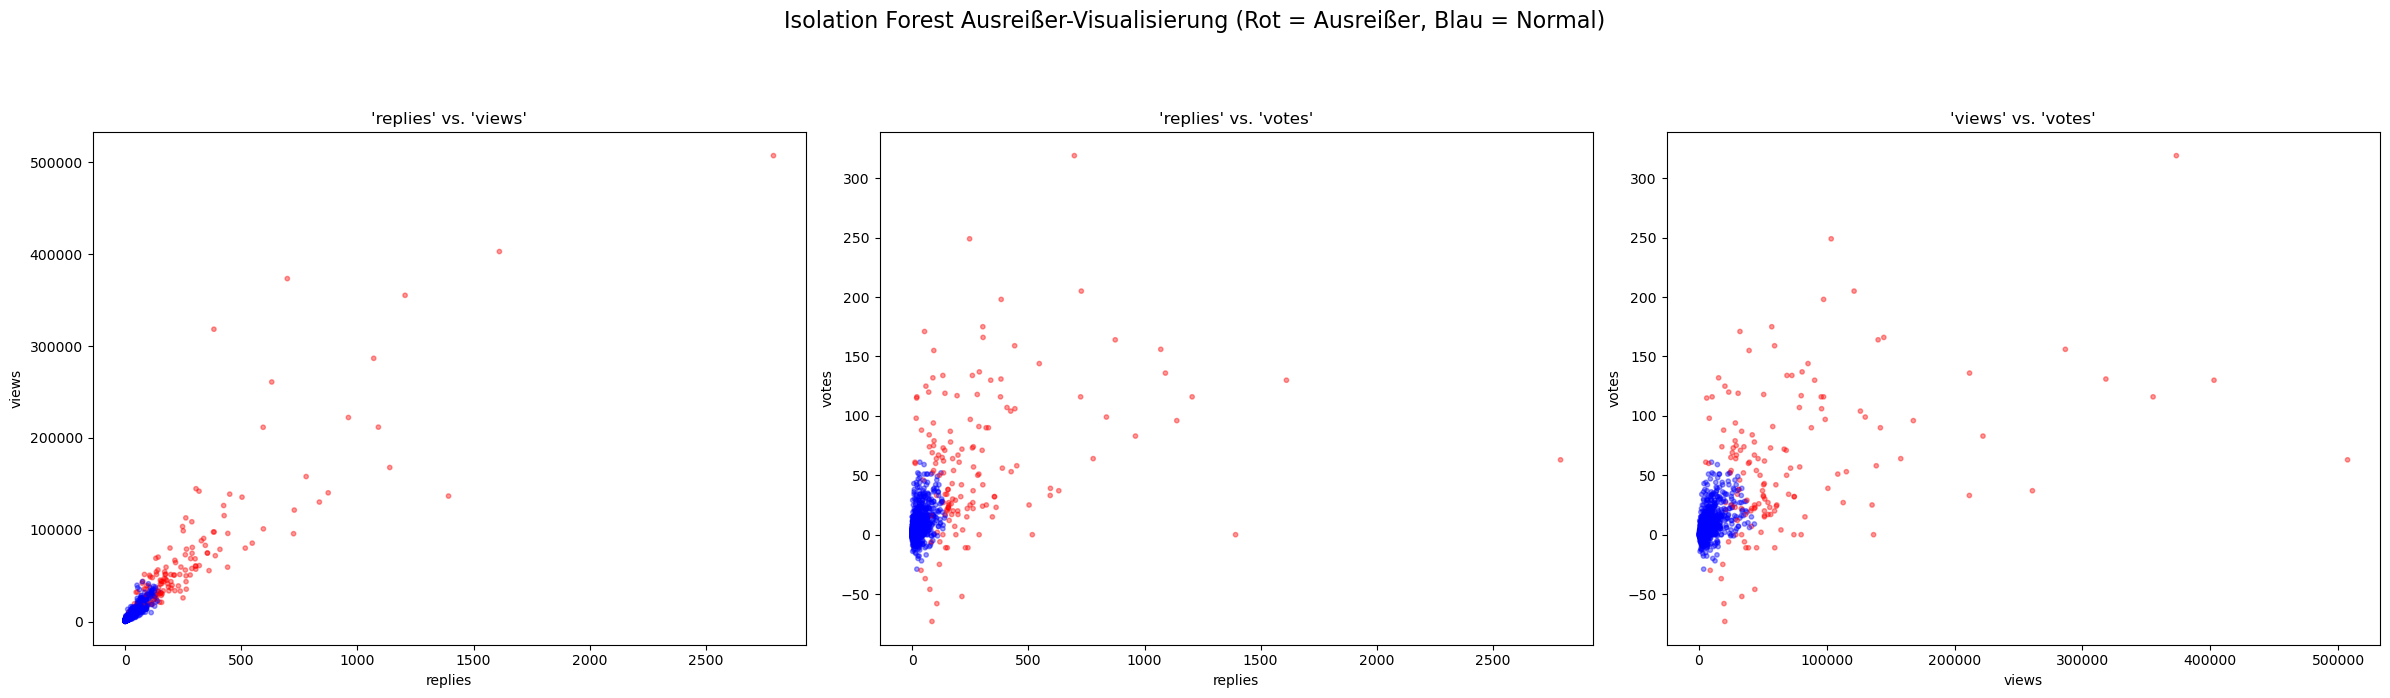


Visuelle Bestätigung:
Die roten Punkte (Ausreißer) sind jene Datenpunkte, die vom Isolation Forest-Modell als signifikant 'leichter zu isolieren' identifiziert wurden als die dichte Wolke der blauen Punkte (Inlier).
Diese Plots bestätigen die mehrdimensionale Erkennung des Algorithmus.

--- Schritt 6: Ergebnisse speichern und Zusammenfassung ---
Dieses Skript (04) ist nun abgeschlossen.

Ergebnisse (Ausreißer-Indizes) wurden in 'ergebnisse/1.3_iso_forest_ausreisser_indizes.csv' gespeichert.

--- ZUSAMMENFASSUNG EXPERIMENT 1.3 (Isolation Forest) ---
Methode:           Klassisches ML: Isolation Forest
Zieldaten:         rfd_main.csv (Shape: (1326, 15))
Zielspalten:       ['replies', 'views', 'votes'] (als 3D-Merkmalsraum)
Parameter (Cont.): auto
Parameter (R-State): 42
ERGEBNIS (COUNT):  144 einzigartige Ausreißerzeilen identifiziert.
Die Evaluierung dieser 144 Indizes erfolgt im Rahmen der quantitativen Analyse (Anzahl, Veränderung und Überschneidung der Ausreißermengen) in einem separ

In [ ]:
################################################################################
# MASTERARBEIT - SKRIPT 04:
# EXPERIMENT 1.3 (Forschungsfrage 1) - AUSREISSERERKENNUNG (ISOLATION FOREST)
################################################################################
#
# ZWECK DIESES SKRIPTS (Methodik gemäß Abschnitt 3.3.1):
#
# 1. (Laden): Lädt den 'schmutzigen' Rohdatensatz (rfd_main.csv).
#
# 2. (Zielspalten): Fokussiert sich auf dieselben Spalten der 
#    Forschungsfrage 1 ('replies', 'views', 'votes'), um die 
#    Vergleichbarkeit der Methoden (IQR, LOF, Isolation Forest) 
#    zu gewährleisten.
#
# 3. (Methode): Wendet die dritte Methode (zweite klassische ML-Methode) an:
#    Isolation Forest. Diese Methode repräsentiert 
#    einen fundamental anderen Ansatz als IQR (Statistik) oder LOF (Dichte).
#    Sie basiert auf dem Prinzip der Isolation, nicht auf Distanz- oder 
#    Dichtemessungen (gemäß Abschnitt 2.2.2.2).
#
# 4. (Detektion): Führt die Ausreißererkennung durch und identifiziert 
#    die Indizes der Datenpunkte, die laut Isolation Forest als 
#    Ausreißer (anomale Instanzen) gelten.
#
# 5. (Visualisierung): Erstellt Streudiagramme (Scatter-Plots), um 
#    die von Isolation Forest identifizierten Ausreißer visuell 
#    abzugrenzen (analog zu Skript 03 - LOF).
#
# 6. (Speichern): Speichert die identifizierten Ausreißer-Indizes. 
#
################################################################################

# Schritt 1: Notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Spezieller Import für die Isolation Forest-Methode aus scikit-learn
# (gemäß Abschnitt 3.5 als Standardimplementierung gewählt).
# Die Bezeichnungen 'sklearn.ensemble' und 'IsolationForest' 
# sind feste Funktionsnamen der Python-Bibliothek.
from sklearn.ensemble import IsolationForest
#
################################################################################

# SCHRITT 2: Laden des 'schmutzigen' Rohdatensatzes
print("--- Schritt 2: 'Schmutzigen' Rohdatensatz laden ---")

# Gemäß ZWECK-Schritt 1 wird der 'schmutzige' Rohdatensatz (rfd_main.csv) geladen.
dateipfad = 'rfd_main.csv'
df_schmutzig = pd.read_csv(dateipfad)

# Die .shape-Ausgabe bestätigt die Dimensionen des Datensatzes.
# Dies ist ein Kontrollschritt, um sicherzustellen, dass die korrekte Datei 
# mit allen 1326 Zeilen geladen wurde.
print(f"Datensatz geladen: {dateipfad}")
print(f"Dimensionen (Zeilen, Spalten): {df_schmutzig.shape}")
print("=" * 70)
#
################################################################################

# SCHRITT 3: Zielspalten definieren, begründen und auf NaN prüfen
print("\n--- Schritt 3: Zielspalten definieren, begründen und auf NaN prüfen ---")

# --- BEGRÜNDUNG DER SPALTENAUSWAHL (basierend auf EDA Skript 01, Schritt 4) ---
#
# Für den Isolation Forest-Algorithmus (eine klassische ML-Methode) werden 
# dieselben Zielspalten wie für den IQR und LOF verwendet, um eine 
# methodisch konsistente Vergleichbarkeit (gemäß Forschungsfrage 1) zu 
# gewährleisten.
#
# 1. AUSGESCHLOSSENE SPALTE ('Unnamed: 0'): 
#    Diese Spalte wird ausgeschlossen, da sie als irrelevanter, 
#    technischer Index identifiziert wurde.
#
# 2. AUSGEWÄHLTE SPALTEN ('replies', 'views', 'votes'): 
#    Diese drei Spalten wurden als primäre Ziele für die 
#    Ausreißererkennung identifiziert. Der Isolation Forest wird 
#    auf diesem 3-dimensionalen Datenraum operieren.
#
# --- ENDE DER BEGRÜNDUNG ---

zielspalten = ['replies', 'views', 'votes']

# Methodische Prüfung auf NaN-Werte (Wissenschaftliche Sorgfalt):
# Die scikit-learn Implementierung des Isolation Forest kann nicht direkt mit 
# fehlenden Werten (NaN) umgehen. Daher ist diese Überprüfung eine 
# zwingende technische Voraussetzung für die Anwendung der Methode.
print("Prüfung auf fehlende Werte (NaN) in den Zielspalten:")
fehlende_werte = df_schmutzig[zielspalten].isnull().sum()
print(fehlende_werte)

if fehlende_werte.sum() > 0:
    print("\nWARNUNG: Es wurden fehlende Werte gefunden. Diese müssen vor der \
Isolation Forest-Anwendung behandelt werden.")
else:
    print("\nSTATUS: Keine fehlenden Werte (NaN) in den Zielspalten gefunden. \
Die Isolation Forest-Methode kann direkt angewendet werden.")

print("=" * 70)
#
################################################################################

# SCHRITT 4: Definition und Anwendung der Isolation Forest-Methode
print("\n--- Schritt 4: Isolation Forest-Methode anwenden ---")

# Gemäß ZWECK-Schritt 3 wird nun der Isolation Forest-Algorithmus angewendet.

# 1. Extrahieren der Zieldaten
# Wie beim LOF-Experiment (Skript 03) werden die drei Zielspalten 
# als 3D-Merkmalsraum für die ML-Methode extrahiert.
X = df_schmutzig[zielspalten].values
print(f"Daten für Isolation Forest-Analyse vorbereitet (Shape: {X.shape})")

# 2. Initialisierung des Isolation Forest-Modells
# Wir verwenden die Standardimplementierung von scikit-learn, 
# wie in Abschnitt 3.5 der Methodik festgelegt.
#
# Wichtige methodische Parameter (gemäß Abschnitt 2.2.2.2):
#   contamination: 'auto' (Standardwert). Dieser Parameter dient als 
#                  Schwellenwert und gibt den erwarteten Anteil an 
#                  Ausreißern im Datensatz an. Wir verwenden 'auto' 
#                  analog zum LOF-Experiment, um die Vergleichbarkeit 
#                  der ML-Methoden zu wahren.
#   random_state: 42. Der Isolation Forest ist ein stochastischer 
#                 (zufälliger) Algorithmus. Das Setzen eines 
#                 'random_state' (eines Startwertes) ist eine 
#                 methodische Notwendigkeit, um sicherzustellen, dass 
#                 dieses Experiment reproduzierbar ist und bei jeder 
#                 Ausführung exakt dasselbe Ergebnis liefert.

iso_forest_modell = IsolationForest(
    contamination='auto', 
    random_state=42
)

# 3. Training des Modells und Vorhersage der Ausreißer
# Die Funktion .fit_predict() führt zwei Schritte aus: 
# (1) Sie erstellt die Isolationsbäume (fit) und 
# (2) weist jedem Datenpunkt ein Label zu (predict).
#
# Die Labels sind (identisch zu LOF):
#   1 = Inlier (normaler Datenpunkt)
#  -1 = Outlier (Ausreißer)
print("Starte Isolation Forest-Analyse (fit_predict)...")
y_vorhersage = iso_forest_modell.fit_predict(X)
print("Isolation Forest-Analyse abgeschlossen.")

# 4. Extrahieren der als Ausreißer identifizierten Indizes
# Wir filtern die ursprünglichen DataFrame-Indizes, 
# bei denen die Vorhersage (y_vorhersage) dem Wert -1 (Ausreißer) entspricht.
ausreisser_indizes_iso = df_schmutzig.index[y_vorhersage == -1].tolist()

# 5. Zusammenfassung dieses Schritts
print(f"ERGEBNIS (Isolation Forest): {len(ausreisser_indizes_iso)} Zeilen wurden als \
Ausreißer (Label -1) identifiziert.")
print("=" * 70)
#
################################################################################

# SCHRITT 5: Visualisierung der Isolation Forest-Ergebnisse (Streudiagramme)
print("\n--- Schritt 5: Visualisierung der Isolation Forest-Ergebnisse (Streudiagramme) ---")

# Gemäß ZWECK-Schritt 5 werden nun die Ergebnisse des Isolation Forest visualisiert.
#
# Methodischer Ansatz (analog zu Skript 03 - LOF):
# Da der Isolation Forest-Ansatz multivariat (mehrdimensional) ist und die 
# Ausreißer basierend auf dem 3D-Raum ('replies', 'views', 'votes') gefunden hat,
# erstellen wir 2D-Streudiagramme (Scatter-Plots) für jede Spaltenkombination.
#
# Diese Plots zeigen visuell, welche Punkte (in Rot) vom Modell als 
# "leicht zu isolieren" (anomal) eingestuft wurden, im Gegensatz zu den 
# normalen Datenpunkten (in Blau).

print("Erstelle Streudiagramme zur Visualisierung der Isolation Forest-Ergebnisse...")

# 1. Erstellen einer Farbzuordnung
# Wir verwenden die Ergebnisse (y_vorhersage) aus Schritt 4.
# Normale Punkte (Label 1) werden blau ('blue')
# Ausreißer (Label -1) werden rot ('red')
farben = np.where(y_vorhersage == 1, 'blue', 'red')

# 2. Definieren der 2D-Plot-Kombinationen (um 3D-Daten zu zeigen)
plot_kombinationen = [
    ('replies', 'views'),
    ('replies', 'votes'),
    ('views', 'votes')
]

# 3. Erstellen der Plots
fig, axes = plt.subplots(nrows=1, ncols=len(plot_kombinationen), figsize=(24, 7))

# Setzen eines Haupttitels für die gesamte Abbildung
fig.suptitle('Isolation Forest Ausreißer-Visualisierung (Rot = Ausreißer, Blau = Normal)', 
             fontsize=16, y=1.02)

for i, (spalte_x, spalte_y) in enumerate(plot_kombinationen):
    ax = axes[i]
    
    # Erstellen des Streudiagramms
    ax.scatter(
        df_schmutzig[spalte_x], 
        df_schmutzig[spalte_y], 
        c=farben,       # Farben basierend auf der Isolation Forest-Vorhersage
        s=10,           # Kleine Punktgröße
        alpha=0.4       # Transparenz für überlappende Punkte
    )
    
    ax.set_title(f"'{spalte_x}' vs. '{spalte_y}'")
    ax.set_xlabel(spalte_x)
    ax.set_ylabel(spalte_y)

# Optimiert das Layout, um Überlappungen zu verhindern
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nVisuelle Bestätigung:")
print("Die roten Punkte (Ausreißer) sind jene Datenpunkte, die vom \
Isolation Forest-Modell als signifikant 'leichter zu isolieren' \
identifiziert wurden als die dichte Wolke der blauen Punkte (Inlier).")
print("Diese Plots bestätigen die mehrdimensionale Erkennung des Algorithmus.")
print("=" * 70)
#
################################################################################

# SCHRITT 6: Ergebnisse speichern und Zusammenfassung
print("\n--- Schritt 6: Ergebnisse speichern und Zusammenfassung ---")
print("Dieses Skript (04) ist nun abgeschlossen.")

# Wir stellen sicher, dass der Speicher-Ordner ('ergebnisse') existiert,
# um die Ergebnisse strukturiert abzulegen.
os.makedirs('ergebnisse', exist_ok=True)

# Gemäß ZWECK-Schritt 6 werden die identifizierten Ausreißer-Indizes 
# für die spätere Evaluierung gespeichert.

# 1. Definieren des Dateipfads für die Ergebnisse
ergebnis_dateipfad = 'ergebnisse/1.3_iso_forest_ausreisser_indizes.csv'

# 2. Umwandeln der Index-Liste in eine sortierte Liste
# (aus Schritt 4, 'ausreisser_indizes_iso')
# Dies gewährleistet eine konsistente, reproduzierbare Ausgabe-Datei.
ausreisser_liste_sortiert = sorted(ausreisser_indizes_iso)

# 3. Erstellen eines Pandas DataFrame aus der Liste
df_ergebnisse_iso = pd.DataFrame(
    ausreisser_liste_sortiert, 
    columns=['Ausreisser_Index']
)

# 4. Speichern des DataFrames als CSV-Datei
df_ergebnisse_iso.to_csv(ergebnis_dateipfad, index=False)

print(f"\nErgebnisse (Ausreißer-Indizes) wurden in '{ergebnis_dateipfad}' gespeichert.")

# --- ZUSAMMENFASSUNG (Für das Protokoll/die Masterarbeit) ---
# Die folgende Zusammenfassung dokumentiert das quantitative Hauptergebnis 
# dieses Experiments (Skript 04) für die Berichterstattung in der Masterarbeit.
print("\n--- ZUSAMMENFASSUNG EXPERIMENT 1.3 (Isolation Forest) ---")
print(f"Methode:           Klassisches ML: Isolation Forest")
print(f"Zieldaten:         {dateipfad} (Shape: {df_schmutzig.shape})")
print(f"Zielspalten:       {zielspalten} (als 3D-Merkmalsraum)")
print(f"Parameter (Cont.): {iso_forest_modell.contamination}")
print(f"Parameter (R-State): {iso_forest_modell.random_state}")
print(f"ERGEBNIS (COUNT):  {len(df_ergebnisse_iso)} einzigartige Ausreißerzeilen identifiziert.")
print("=" * 70)
print(f"Die Evaluierung dieser {len(df_ergebnisse_iso)} Indizes erfolgt im Rahmen der \
quantitativen Analyse (Anzahl, Veränderung und Überschneidung der Ausreißermengen) \
in einem separaten Evaluierungs-Skript gemäß Abschnitt 3.4.")
print("=" * 70)
#
################################################################################